## MULTICLASS CLASSIFICATION

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [270]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [271]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [272]:
X_train_T=X_train.T/255
X_test_T=X_test.T/255

In [273]:
def init_params():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A=np.exp(Z) / sum(np.exp(Z))
    return A   

def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

def deriv_ReLU(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m=Y.size
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    dW2=1/m*dZ2.dot(A1.T)
    db2=1/m*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1=1/m*dZ1.dot(X.T)
    db1=1/m*np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2    

In [274]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%10==0:
            print("Iteration: ",i)
            predictions=get_predictions(A2)
            print("Acccuracy:" , get_accuracy(predictions,Y))
    return W1,b1,W2,b2

In [275]:
W1,b1,W2,b2=gradient_descent(X_train_T,y_train,0.10,201)

Iteration:  0
Acccuracy: 0.10116666666666667
Iteration:  10
Acccuracy: 0.19021666666666667
Iteration:  20
Acccuracy: 0.29485
Iteration:  30
Acccuracy: 0.36711666666666665
Iteration:  40
Acccuracy: 0.4192666666666667
Iteration:  50
Acccuracy: 0.4642
Iteration:  60
Acccuracy: 0.5044333333333333
Iteration:  70
Acccuracy: 0.5369
Iteration:  80
Acccuracy: 0.5644
Iteration:  90
Acccuracy: 0.5882833333333334
Iteration:  100
Acccuracy: 0.6078333333333333
Iteration:  110
Acccuracy: 0.6238
Iteration:  120
Acccuracy: 0.6380666666666667
Iteration:  130
Acccuracy: 0.6510833333333333
Iteration:  140
Acccuracy: 0.6627
Iteration:  150
Acccuracy: 0.67255
Iteration:  160
Acccuracy: 0.6827666666666666
Iteration:  170
Acccuracy: 0.6924166666666667
Iteration:  180
Acccuracy: 0.7007166666666667
Iteration:  190
Acccuracy: 0.7108833333333333
Iteration:  200
Acccuracy: 0.7191166666666666


In [276]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train_T[:, index, None]
    prediction = make_predictions(X_train_T[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


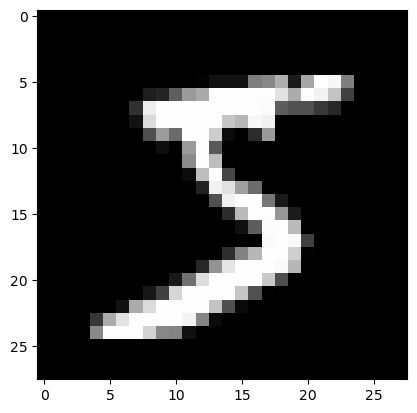

Prediction:  [0]
Label:  0


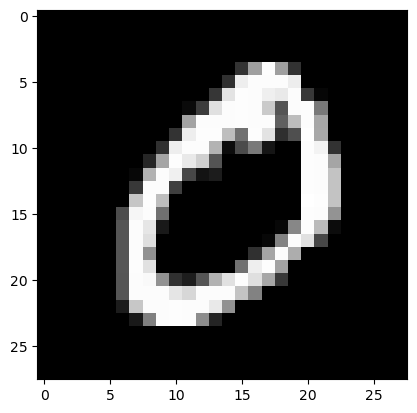

Prediction:  [9]
Label:  4


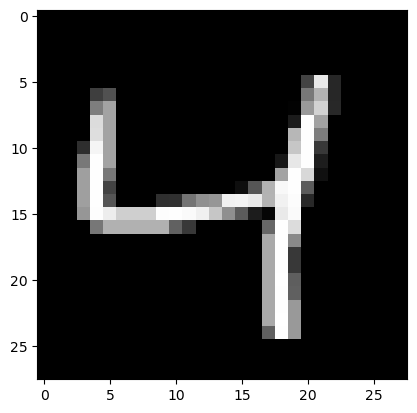

Prediction:  [1]
Label:  1


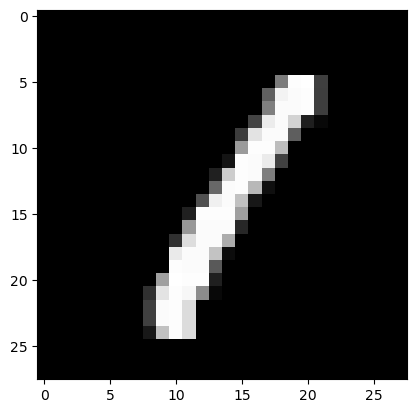

In [277]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [278]:
dev_predictions = make_predictions(X_test_T, W1, b1, W2, b2)
get_accuracy(dev_predictions, y_test)

0.721

## BINARY CLASSIFICATION

In [287]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [288]:
X=data.data
y=data.target

In [289]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [290]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

scaler_x.fit(X_train)

X_train=scaler_x.transform(X_train)

X_test=scaler_x.transform(X_test)


In [291]:
X_train_T=X_train.T
X_test_T=X_test.T

In [292]:
#CREANDO UNA RED NEURONAL PARA UNA CLASIFICACION BINARIA

def init_params():
    W1=np.random.rand(10,30)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(1,10)-0.5
    b2=np.random.rand(1,1)-0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)


def sigmoid(Z):
    return 1 /(1+np.exp(-Z))
 
def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=sigmoid(Z2)
    return Z1,A1,Z2,A2

def deriv_ReLU(Z):
    return Z>0

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m=Y.size
    dZ2=A2-Y
    dW2=1/m*dZ2.dot(A1.T)
    db2=1/m*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1=1/m*dZ1.dot(X.T)
    db1=1/m*np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2

def get_predictions(A2):
    return np.round(A2[0])

def get_accuracy(predictions,Y):
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%50==0:
            print("Iteration: ",i)
            predictions=get_predictions(A2)
            print("Acccuracy:" , get_accuracy(predictions,Y))
    return W1,b1,W2,b2

W1,b1,W2,b2=gradient_descent(X_train_T,y_train,0.010,501)

Iteration:  0
Acccuracy: 0.5175879396984925
Iteration:  50
Acccuracy: 0.7864321608040201
Iteration:  100
Acccuracy: 0.8492462311557789
Iteration:  150
Acccuracy: 0.8869346733668342
Iteration:  200
Acccuracy: 0.9045226130653267
Iteration:  250
Acccuracy: 0.9271356783919598
Iteration:  300
Acccuracy: 0.9321608040201005
Iteration:  350
Acccuracy: 0.9346733668341709
Iteration:  400
Acccuracy: 0.9422110552763819
Iteration:  450
Acccuracy: 0.949748743718593
Iteration:  500
Acccuracy: 0.957286432160804


In [293]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [294]:
dev_predictions = make_predictions(X_test_T, W1, b1, W2, b2)
get_accuracy(dev_predictions, y_test)

0.9649122807017544

## REGRESSION

In [295]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X=data.data
y=data.target

In [296]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [297]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

scaler_x.fit(X_train)

X_train=scaler_x.transform(X_train)

X_test=scaler_x.transform(X_test)


In [298]:
X_train_T=X_train.T
X_test_T=X_test.T

In [299]:
X_train_T.shape

(8, 14448)

In [301]:
##Neural Network with one layer

def init_params():
    W1=np.random.rand(1000,8)-0.5
    b1=np.random.rand(1000,1)-0.5
    W2=np.random.rand(1,1000)-0.5
    b2=np.random.rand(1,1)-0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=(Z2)
    return Z1,A1,Z2,A2

def deriv_ReLU(Z):
    return Z>0


def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m=Y.size
    dZ2=A2-Y
    dW2=2/m*dZ2.dot(A1.T)
    db2=2/m*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1=2/m*dZ1.dot(X.T)
    db1=2/m*np.sum(dZ1)
    return dW1,db1,dW2,db2


def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2


def mse(predictions,Y):
    return np.mean((predictions-Y)**2)


def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%100==0:
            print("Iteration: ",i)
            predictions=A2
            print("MSE:" , mse(predictions,Y))
    return W1,b1,W2,b2

W1,b1,W2,b2=gradient_descent(X_train_T,y_train,0.010,1001)

Iteration:  0
MSE: 30.10121827979336
Iteration:  100
MSE: 1.0032788650107518
Iteration:  200
MSE: 0.7311767396453884
Iteration:  300
MSE: 0.6367858218955045
Iteration:  400
MSE: 0.585875903508682
Iteration:  500
MSE: 0.5520803456774303
Iteration:  600
MSE: 0.5266238053150261
Iteration:  700
MSE: 0.505754513427594
Iteration:  800
MSE: 0.4883185568398406
Iteration:  900
MSE: 0.47407441201781886
Iteration:  1000
MSE: 0.4622653656779454


In [302]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return A2

dev_predictions = make_predictions(X_test_T, W1, b1, W2, b2)

mse(dev_predictions, y_test)

0.4763285222204434

In [303]:
#Adding and extra layer to the last neural network to see if we can reduce the error

def init_params():
    W1=np.random.rand(100,8)-0.5
    b1=np.random.rand(100,1)-0.5
    W2=np.random.rand(50,100)-0.5
    b2=np.random.rand(50,1)-0.5
    W3=np.random.rand(1,50)-0.5
    b3=np.random.rand(1,1)-0.5
    return W1,b1,W2,b2,W3,b3

def ReLU(Z):
    return np.maximum(Z,0)
 
def forward_prop(W1,b1,W2,b2,W3,b3,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=ReLU(Z2)
    Z3=W3.dot(A2)+b3
    A3=Z3
    return Z1,A1,Z2,A2,Z3,A3

def deriv_ReLU(Z):  
    return Z>0

def back_prop(Z1,A1,Z2,A2,Z3,A3,W1,W2,W3,X,Y):
    m=Y.size
    dZ3=A3-Y
    dW3=2/m*dZ3.dot(A2.T)
    db3=2/m*np.sum(dZ3)
    dZ2=W3.T.dot(dZ3)*deriv_ReLU(Z2)
    dW2=2/m*dZ2.dot(A1.T)
    db2=2/m*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1=2/m*dZ1.dot(X.T)
    db1=2/m*np.sum(dZ1)
    return dW1,db1,dW2,db2,dW3,db3


def update_params(W1,b1,W2,b2,W3,b3,dW1,db1,dW2,db2,dW3,db3,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    W3=W3-alpha*dW3
    b3=b3-alpha*db3
    return W1,b1,W2,b2,W3,b3


def mse(predictions,Y):
    n=Y.size
    return (np.sum((predictions-Y)**2))/n


def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2,W3,b3=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2,Z3,A3=forward_prop(W1,b1,W2,b2,W3,b3,X)
        dW1,db1,dW2,db2,dW3,db3=back_prop(Z1,A1,Z2,A2,Z3,A3,W1,W2,W3,X,Y)
        W1,b1,W2,b2,W3,b3=update_params(W1,b1,W2,b2,W3,b3,dW1,db1,dW2,db2,dW3,db3,alpha)
        if i%100==0:
            print("Iteration: ",i)
            predictions=A3
            print("MSE:" , mse(predictions,Y))
    return W1,b1,W2,b2,W3,b3

W1,b1,W2,b2,W3,b3=gradient_descent(X_train_T,y_train,0.010,1001)

Iteration:  0
MSE: 10.839493923985358
Iteration:  100
MSE: 0.550658802316283
Iteration:  200
MSE: 0.4861627083796509
Iteration:  300
MSE: 0.45653838691877663
Iteration:  400
MSE: 0.43843732507215905
Iteration:  500
MSE: 0.42546216816394067
Iteration:  600
MSE: 0.41526852263765596
Iteration:  700
MSE: 0.4072150202932487
Iteration:  800
MSE: 0.40034552494894976
Iteration:  900
MSE: 0.394347720097473
Iteration:  1000
MSE: 0.3890995324812692


In [305]:
def make_predictions(X, W1, b1, W2, b2,W3,b3):
    _, _, _,_,_,A3 = forward_prop(W1, b1, W2, b2, W3,b3,X)
    return A3

dev_predictions = make_predictions(X_test_T, W1, b1, W2, b2,W3,b3)

mse(dev_predictions, y_test)

0.40431135199329077

In [307]:
#CREATING THE SAME NEURAL NETWORK USING THE TENSORFLOW LIBRARY
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD

model=Sequential()
model.add(Dense(100,activation="relu",input_dim=8))
model.add(Dense(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer=SGD(learning_rate=0.01),loss="mse")
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
452/452 [==============================] - 9s 3ms/step - loss: 0.6879
Epoch 2/100
452/452 [==============================] - 1s 2ms/step - loss: 0.5028
Epoch 3/100
452/452 [==============================] - 1s 2ms/step - loss: 0.4771
Epoch 4/100
452/452 [==============================] - 1s 2ms/step - loss: 0.4090
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3937
Epoch 6/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3875
Epoch 7/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3738
Epoch 8/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3703
Epoch 9/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3587
Epoch 10/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3528
Epoch 11/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3491
Epoch 12/100
452/452 [==============================] - 1s 3ms/step - loss: 0.3448
Epoch 13/100


452/452 [==============================] - 1s 2ms/step - loss: 0.2603
Epoch 100/100
452/452 [==============================] - 1s 3ms/step - loss: 0.2583


In [308]:
model.evaluate(X_test,y_test)

194/194 [==============================] - 6s 2ms/step - loss: 0.2920


0.29197123646736145